In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's Pipeline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [9]:
df = pd.read_csv("df.csv")


In [3]:
df.columns


Index(['x_smoker3', 'x_llcpwt', 'smoke100', 'x_bmi5', 'x_bmi5cat', 'menthlth',
       'physhlth', 'genhlth', 'hhadult', 'x_age_g', 'x_age80', 'x_asthms1',
       'x_totinda', 'x_ment14d', 'x_phys14d', 'sex1', 'x_imprace', 'x_educag',
       'marital', 'x_incomg', 'x_metstat', 'x_urbstat', 'employ1', 'x_state',
       'weight2', 'persdoc2', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
       'cvdstrk3', 'asthma3', 'chccopd1', 'havarth3', 'addepev2', 'chckdny1',
       'diabete3', 'educa', 'children', 'height3', 'diffwalk', 'alcday5',
       'pneuvac4', 'x_rfhlth', 'x_ltasth1', 'x_casthm1', 'x_prace1',
       'x_racegr3', 'x_ageg5yr', 'wtkg3', 'x_rfsmok3', 'year'],
      dtype='object')

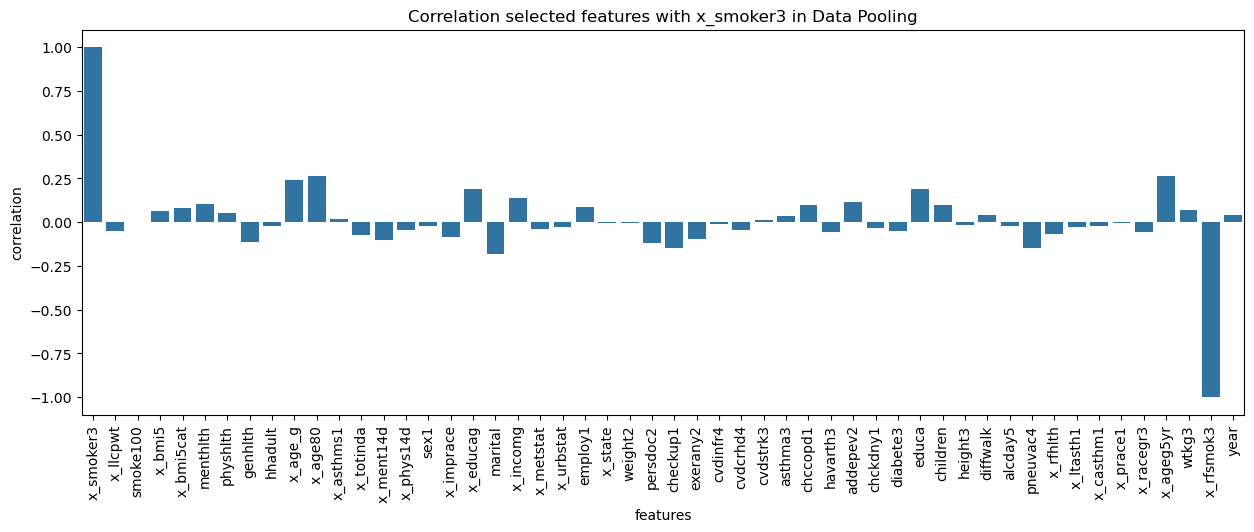

In [5]:
correlation = df.corr()

# plt.figure(figsize=(15,15))
# sns.heatmap(correlation)
# plt.show()

plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.title("Correlation selected features with x_smoker3 in Data Pooling")
plt.xlabel("features")
plt.ylabel("correlation")
plt.show()


In [10]:
# from res_na

numerical_features = [
    'x_llcpwt','x_age80','x_bmi5','weight2','wtkg3','height3',
    'children','hhadult','alcday5','menthlth','physhlth','year'
]

categorical_features = [
    'smoke100','x_bmi5cat','genhlth','x_age_g','x_asthms1','x_ltasth1','x_casthm1',
    'x_totinda','exerany2','x_ment14d','x_phys14d','sex1','x_imprace','x_prace1','x_racegr3',
    'x_educag','educa','marital','x_incomg','x_metstat','x_urbstat','employ1','x_state',
    'persdoc2','checkup1','cvdinfr4','cvdcrhd4','cvdstrk3','asthma3','chccopd1','havarth3','addepev2',
    'chckdny1','diabete3','diffwalk','pneuvac4','x_rfhlth','x_rfsmok3','x_ageg5yr'
]

len(numerical_features+categorical_features)


51

In [11]:
categorical_features.remove("smoke100")
categorical_features.remove("x_rfsmok3")
numerical_features.remove("x_llcpwt")

len(numerical_features+categorical_features)


48

In [15]:
correlation = df[categorical_features+numerical_features+["x_smoker3"]].corr()


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

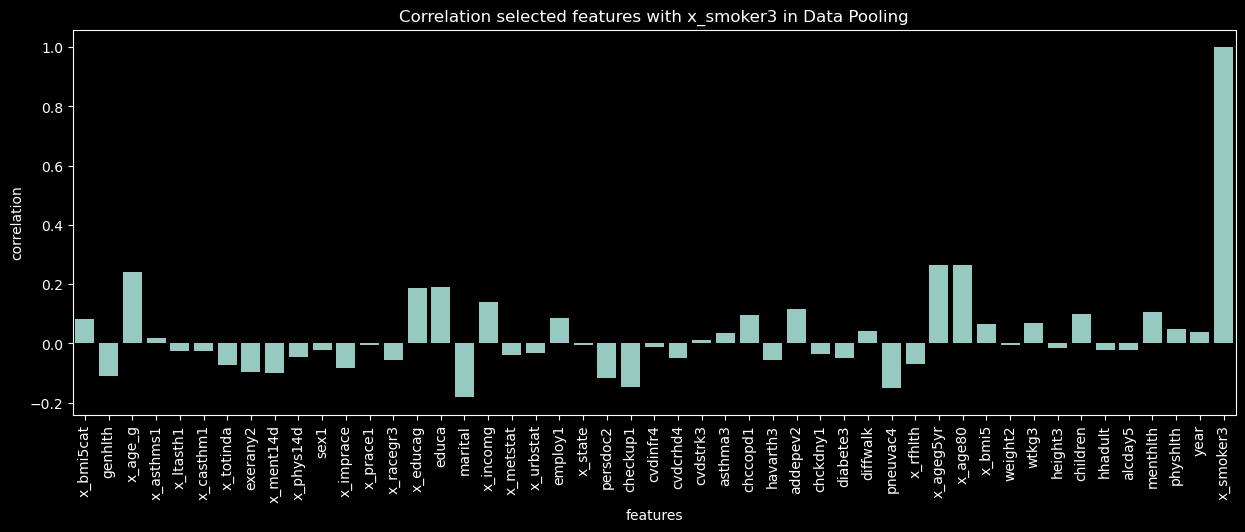

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(y=correlation.x_smoker3.values, x=correlation.x_smoker3.index)
plt.xticks(rotation=90)
plt.title("Correlation selected features with x_smoker3 in Data Pooling")
plt.xlabel("features")
plt.ylabel("correlation")
plt.show()


In [ ]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                # پر کردن مقادیر گمشده عددی با میانگین
    ('scaler', StandardScaler())                                # مقیاس‌بندی ویژگی‌های عددی
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),       # پر کردن مقادیر گمشده متنی/منطقی با مد (پرتکرارترین)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)
X_prepared = preprocessor.fit_transform(df)


In [7]:
y = df["x_smoker3"]

X = df[numerical_features+categorical_features]


In [8]:
X_processed = preprocessor.fit_transform(X)
print(f"\nShape of data after preprocessing: {X_processed.shape}")

feature_names_processed = preprocessor.get_feature_names_out()
print(f"Number of features after preprocessing: {len(feature_names_processed)}")

feature_names_processed



Shape of data after preprocessing: (993627, 48)
Number of features after preprocessing: 48


array(['num__x_age80', 'num__x_bmi5', 'num__weight2', 'num__wtkg3',
       'num__height3', 'num__children', 'num__hhadult', 'num__alcday5',
       'num__menthlth', 'num__physhlth', 'num__year', 'cat__x_bmi5cat',
       'cat__genhlth', 'cat__x_age_g', 'cat__x_asthms1', 'cat__x_ltasth1',
       'cat__x_casthm1', 'cat__x_totinda', 'cat__exerany2',
       'cat__x_ment14d', 'cat__x_phys14d', 'cat__sex1', 'cat__x_imprace',
       'cat__x_prace1', 'cat__x_racegr3', 'cat__x_educag', 'cat__educa',
       'cat__marital', 'cat__x_incomg', 'cat__x_metstat',
       'cat__x_urbstat', 'cat__employ1', 'cat__x_state', 'cat__persdoc2',
       'cat__checkup1', 'cat__cvdinfr4', 'cat__cvdcrhd4', 'cat__cvdstrk3',
       'cat__asthma3', 'cat__chccopd1', 'cat__havarth3', 'cat__addepev2',
       'cat__chckdny1', 'cat__diabete3', 'cat__diffwalk', 'cat__pneuvac4',
       'cat__x_rfhlth', 'cat__x_ageg5yr'], dtype=object)

In [ ]:
weight = df["x_llcpwt"]
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features+categorical_features)


In [ ]:
# def calculate_vif(df_features, threshold=7.0, exceptions=[]):
#     variables = df_features.copy()
#     while True:
#         vif_df = pd.DataFrame()
#         vif_df["Feature"] = variables.columns
#         vif_df["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
#         max_vif = vif_df["VIF"].max()

#         # پیدا کردن ویژگی با بیشترین VIF که جزو استثنائات نباشد
#         to_remove = vif_df.sort_values(by="VIF", ascending=False)
#         for feature in to_remove["Feature"]:
#             if feature not in exceptions:
#                 feature_with_max_vif = feature
#                 break
#         else:
#             print("همه ویژگی‌های با VIF بالا جزو استثناها هستند.")
#             break

#         if max_vif > threshold:
#             print(f"remove feature '{feature_with_max_vif}' with VIF = {max_vif:.2f}")
#             variables = variables.drop(columns=[feature_with_max_vif])
#         else:
#             print(f"ویژگی با VIF بالاتر از {threshold} پیدا نشد.")
#             break

#     print("\nپایان روند حذف ویژگی‌ها با VIF")
#     print(vif_df.sort_values(by="VIF", ascending=False))
#     return variables.columns.to_list()


In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#selected_features_vif = calculate_vif(X_processed_df)

#print("\nSelected features with VIF method:")
#print(selected_features_vif)

#X_vif_selected = X_processed_df[selected_features_vif]


In [ ]:
selected_features_vif = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'year', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
vif_selected = X_processed_df[selected_features_vif]


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

def run_boost_model(model_name, model_constructor_func, X_data, y_data, weights_data):
    model_instance = model_constructor_func()

    y_encoded = y_data if y_data.dtype.kind in 'iuf' else pd.factorize(y_data)[0]

    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X_data, y_encoded, weights_data, test_size=0.2, random_state=42, stratify=y_encoded
    )

    print(f"\n===== Training model: {model_name} =====")
    start_time = time.time()
    model_instance.fit(X_train, y_train, sample_weight=weights_train)
    training_time = time.time() - start_time

    y_pred = model_instance.predict(X_test)
    y_proba = model_instance.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_proba)

    print(f"Training completed in {training_time:.2f} seconds.")
    print(f"Accuracy: {accuracy:.4f} | F1-Score: {f1:.4f} | AUC: {auc:.4f}")

    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    fig.suptitle(f"Evaluation for {model_name}", fontsize=16)
    ConfusionMatrixDisplay.from_estimator(model_instance, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues)
    RocCurveDisplay.from_estimator(model_instance, X_test, y_test, ax=axes[1])
    PrecisionRecallDisplay.from_estimator(model_instance, X_test, y_test, ax=axes[2])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print(f"\n--- SHAP Analysis for {model_name} ---")
    explainer = shap.TreeExplainer(model_instance)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"SHAP Summary Plot - {model_name}")
    plt.show()

    print("\n--- Feature Importance ---")
    importance = model_instance.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X_data.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    print(feature_importance_df)
    
    return {'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'AUC': auc, 'Time (s)': training_time}


In [ ]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

models_boost = {
    'XGBoost': lambda: xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
    ),
    'LightGBM': lambda: lgb.LGBMClassifier(
        objective='binary',
        random_state=42
    ),
    'CatBoost': lambda: cb.CatBoostClassifier(
        random_state=42,
        verbose=0
    )
}


In [ ]:
X_all = X_processed_df.copy()
selected_features_vif = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'year', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
vif_selected = X_processed_df[selected_features_vif]
vif_less_than_7 = ['x_age80', 'x_bmi5', 'weight2', 'wtkg3', 'height3', 'children', 'hhadult', 'alcday5', 'menthlth', 'physhlth', 'x_casthm1', 'x_totinda', 'x_ment14d', 'x_phys14d', 'x_imprace', 'x_prace1', 'marital', 'x_incomg', 'employ1', 'x_state', 'persdoc2', 'checkup1', 'x_rfhlth']
X_vif_selected = X_processed_df[vif_less_than_7]
weights = df["x_llcpwt"].values



===== Training model: XGBoost (All Features) =====


C:\Users\kiyan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:27:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training completed in 2.88 seconds.
Accuracy: 0.7406 | F1-Score: 0.7276 | AUC: 0.7811


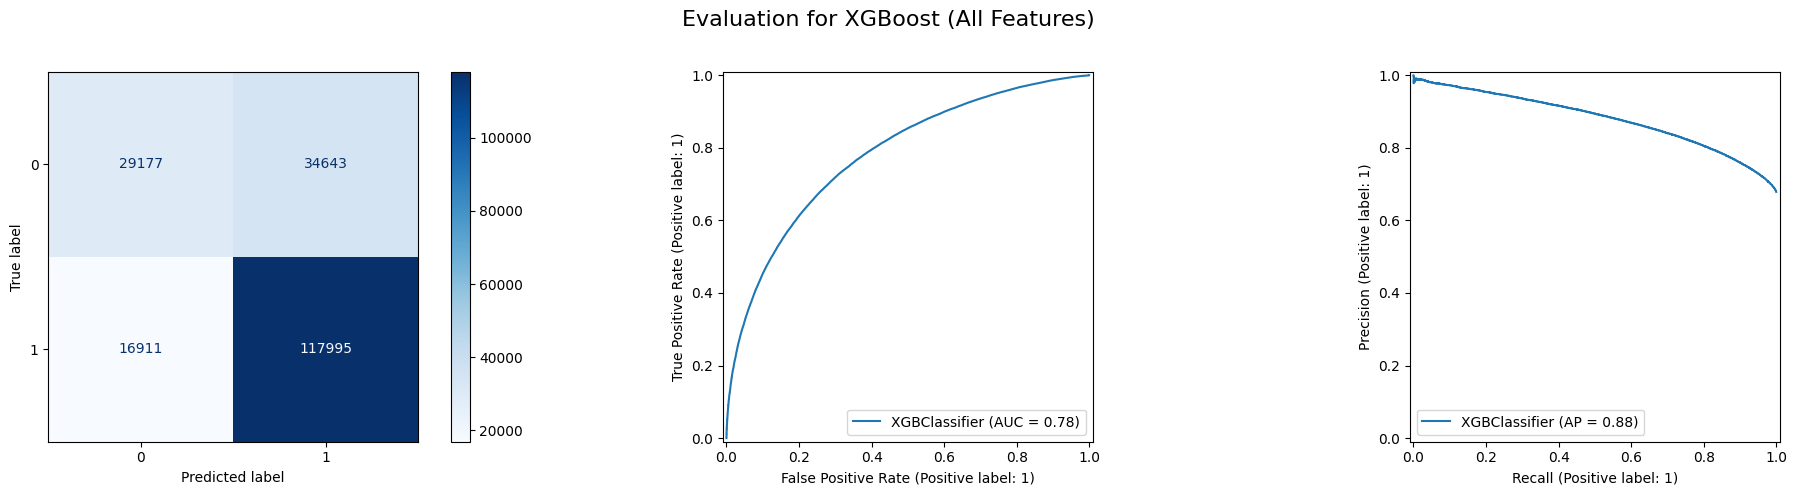


--- SHAP Analysis for XGBoost (All Features) ---


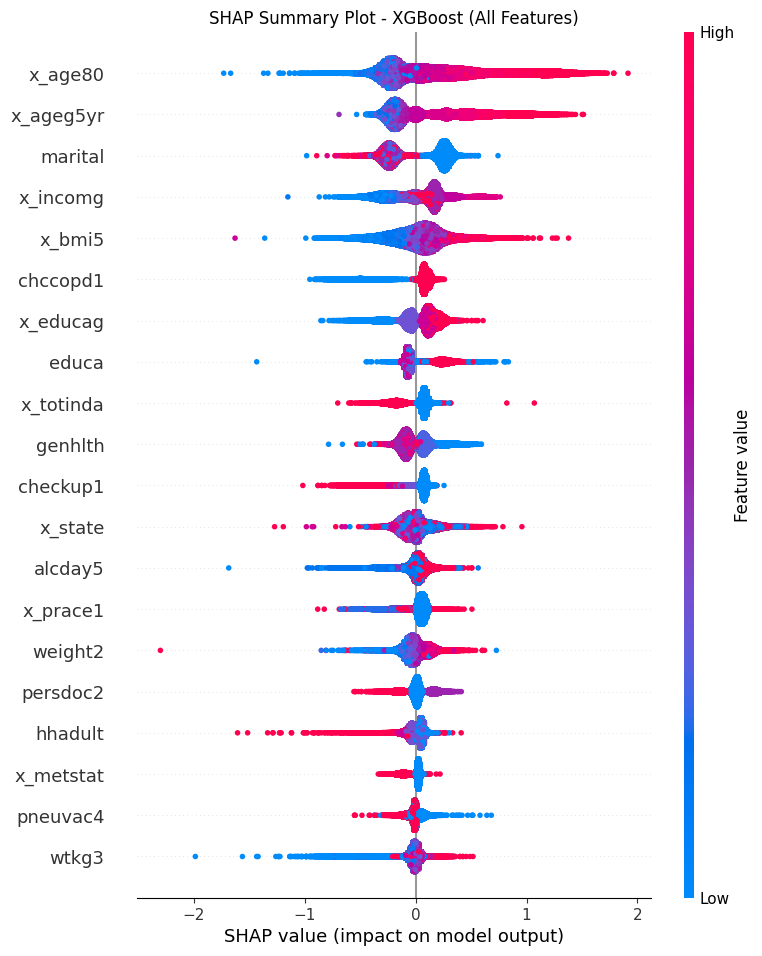


--- Feature Importance ---
      Feature  Importance
47  x_ageg5yr    0.177786
27    marital    0.085696
39   chccopd1    0.059967
26      educa    0.053936
25   x_educag    0.049812
28   x_incomg    0.047505
17  x_totinda    0.040999
0     x_age80    0.034016
33   persdoc2    0.028145
29  x_metstat    0.020565
34   checkup1    0.019951
19  x_ment14d    0.019072
12    genhlth    0.017778
23   x_prace1    0.016941
1      x_bmi5    0.016355
24  x_racegr3    0.016217
18   exerany2    0.015431
45   pneuvac4    0.015210
41   addepev2    0.014469
42   chckdny1    0.012385
11  x_bmi5cat    0.011971
38    asthma3    0.011943
7     alcday5    0.011841
2     weight2    0.011391
44   diffwalk    0.011347
10       year    0.011149
46   x_rfhlth    0.010462
22  x_imprace    0.009958
3       wtkg3    0.009746
43   diabete3    0.009530
32    x_state    0.009413
31    employ1    0.008725
40   havarth3    0.008396
37   cvdstrk3    0.008328
6     hhadult    0.008043
21       sex1    0.008030
16  x_cast

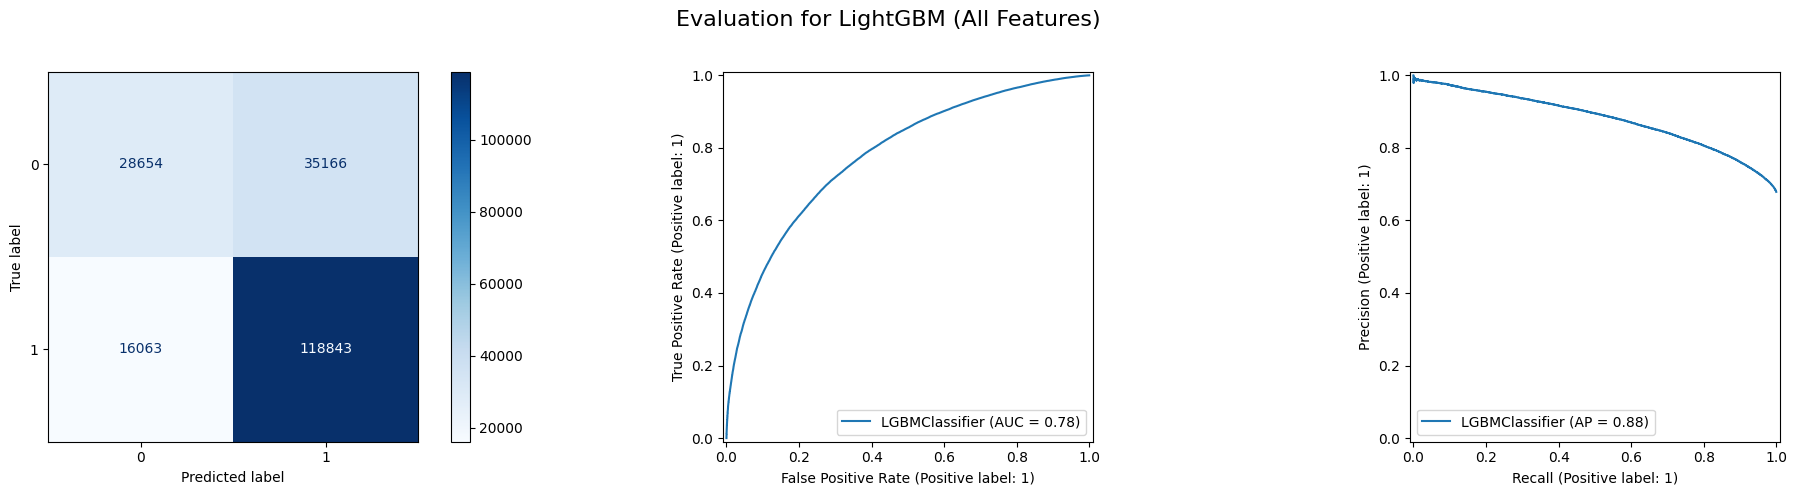


--- SHAP Analysis for LightGBM (All Features) ---


C:\Users\kiyan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


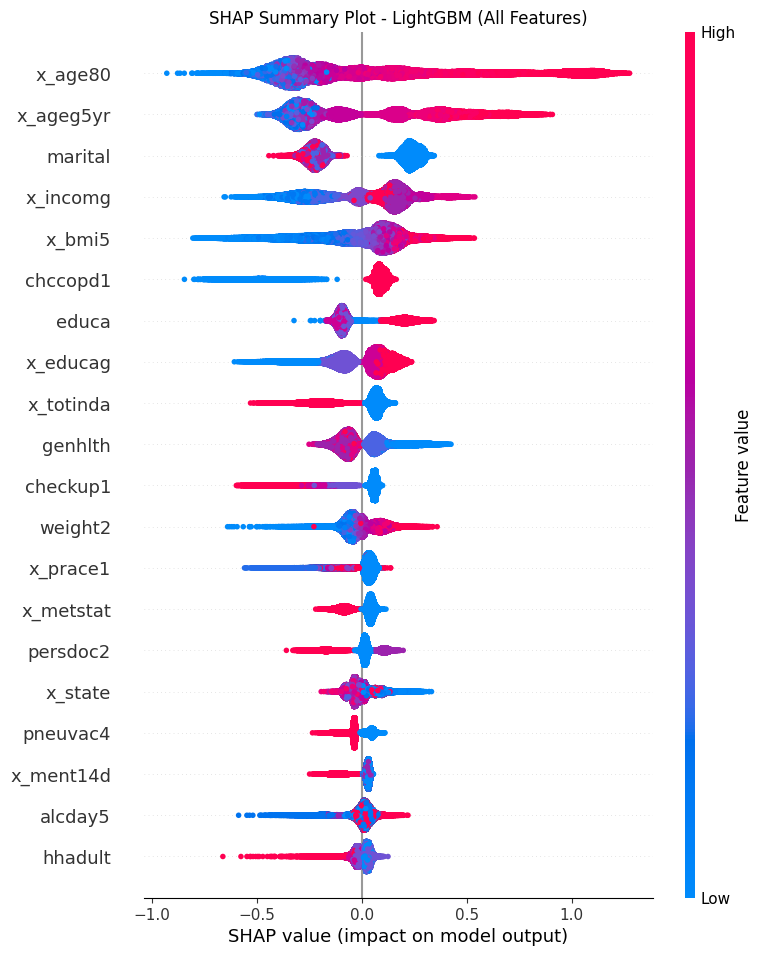


--- Feature Importance ---
      Feature  Importance
0     x_age80         349
1      x_bmi5         248
32    x_state         201
7     alcday5         141
28   x_incomg         141
2     weight2         140
23   x_prace1         109
12    genhlth         102
4     height3          93
39   chccopd1          91
3       wtkg3          86
6     hhadult          85
10       year          82
25   x_educag          81
47  x_ageg5yr          77
31    employ1          70
27    marital          69
22  x_imprace          65
8    menthlth          61
24  x_racegr3          60
34   checkup1          59
33   persdoc2          57
17  x_totinda          57
26      educa          52
45   pneuvac4          47
5    children          38
9    physhlth          33
29  x_metstat          26
42   chckdny1          26
43   diabete3          26
44   diffwalk          23
46   x_rfhlth          23
18   exerany2          22
21       sex1          19
19  x_ment14d          19
41   addepev2          18
14  x_asth

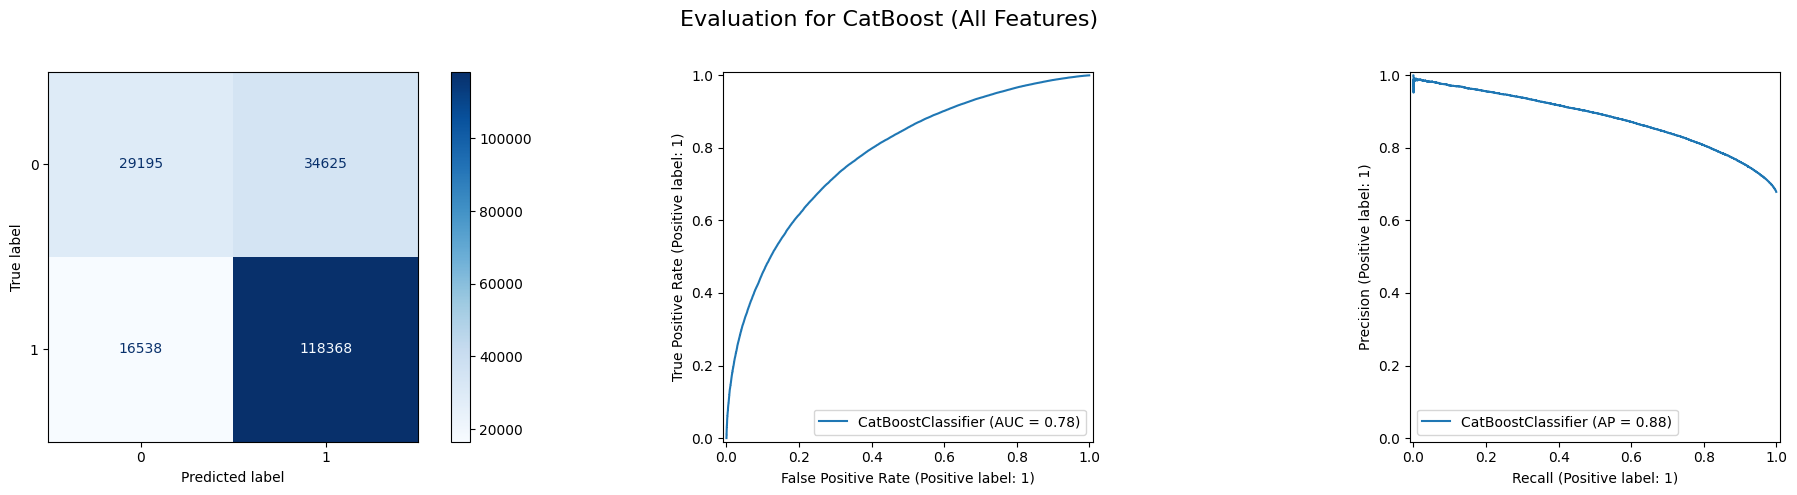


--- SHAP Analysis for CatBoost (All Features) ---


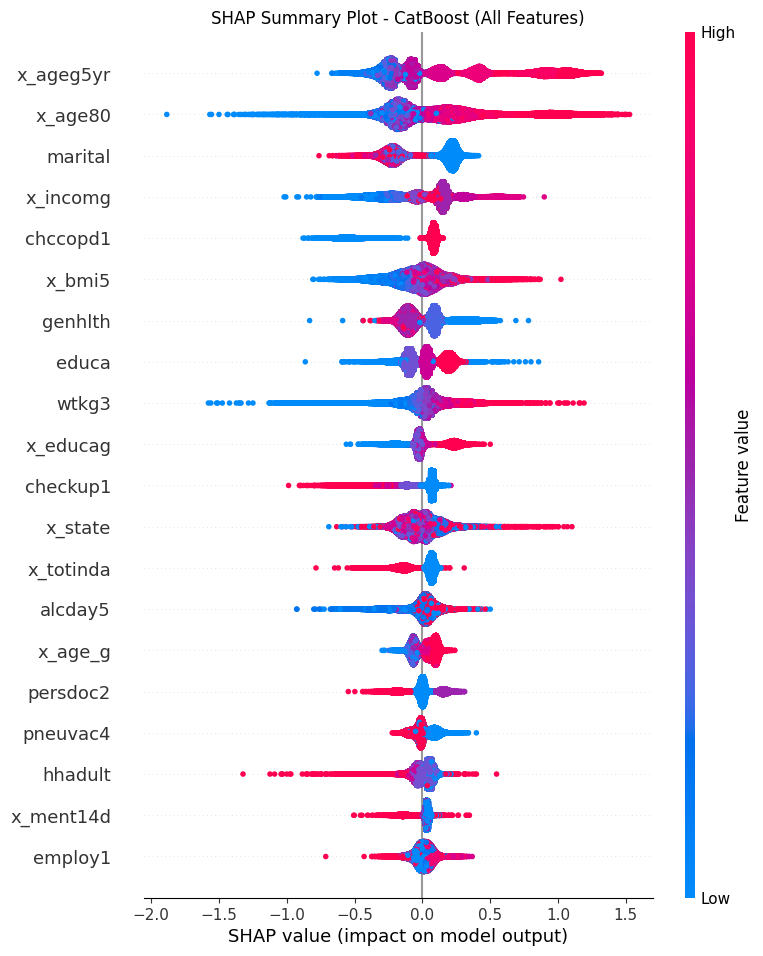


--- Feature Importance ---
      Feature  Importance
47  x_ageg5yr    8.878785
0     x_age80    8.086381
1      x_bmi5    6.773618
32    x_state    5.230012
27    marital    5.200400
28   x_incomg    4.738029
7     alcday5    4.131410
4     height3    3.523770
26      educa    3.516581
3       wtkg3    3.425538
25   x_educag    2.909331
31    employ1    2.786912
6     hhadult    2.535913
12    genhlth    2.408452
10       year    2.357875
2     weight2    2.333764
23   x_prace1    2.323674
34   checkup1    2.173522
22  x_imprace    1.988078
9    physhlth    1.957107
33   persdoc2    1.930027
8    menthlth    1.905160
39   chccopd1    1.802639
24  x_racegr3    1.694262
5    children    1.682461
19  x_ment14d    1.487762
43   diabete3    1.106334
17  x_totinda    1.078207
13    x_age_g    1.077567
45   pneuvac4    0.907470
21       sex1    0.755526
14  x_asthms1    0.736290
20  x_phys14d    0.729832
41   addepev2    0.652828
44   diffwalk    0.644269
18   exerany2    0.525613
40   havar

C:\Users\kiyan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:32:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training completed in 1.87 seconds.
Accuracy: 0.7325 | F1-Score: 0.7186 | AUC: 0.7655


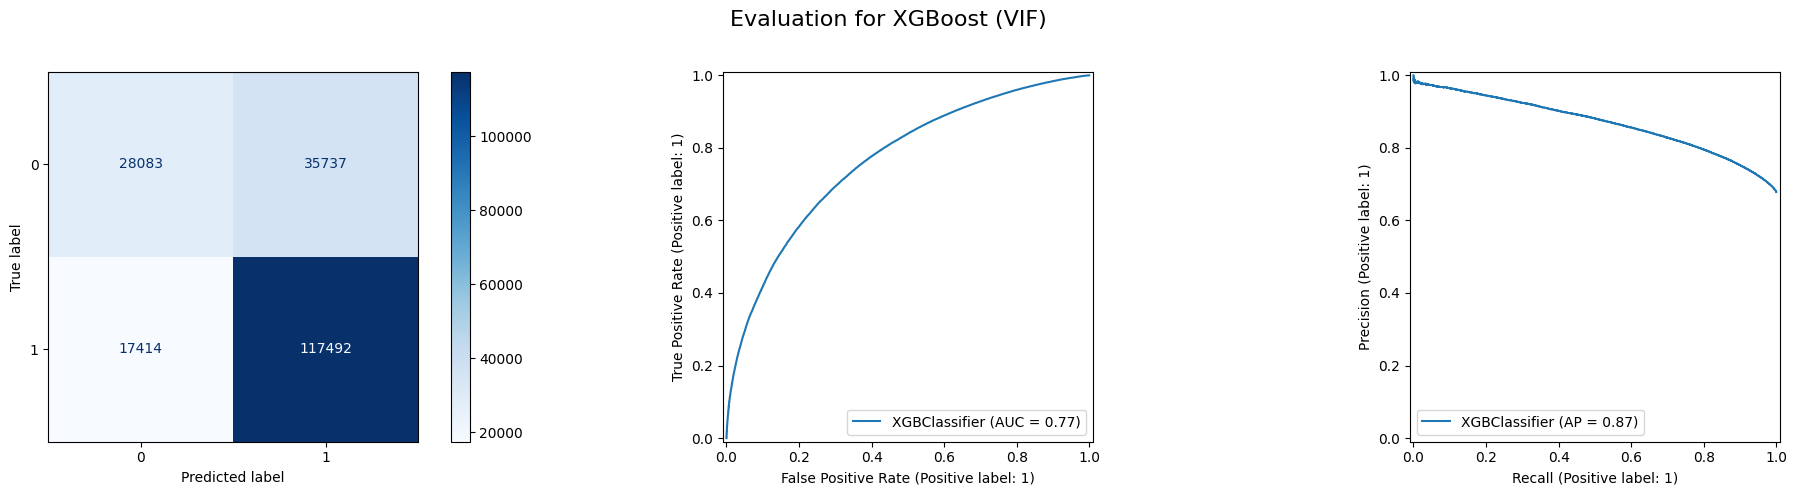


--- SHAP Analysis for XGBoost (VIF) ---


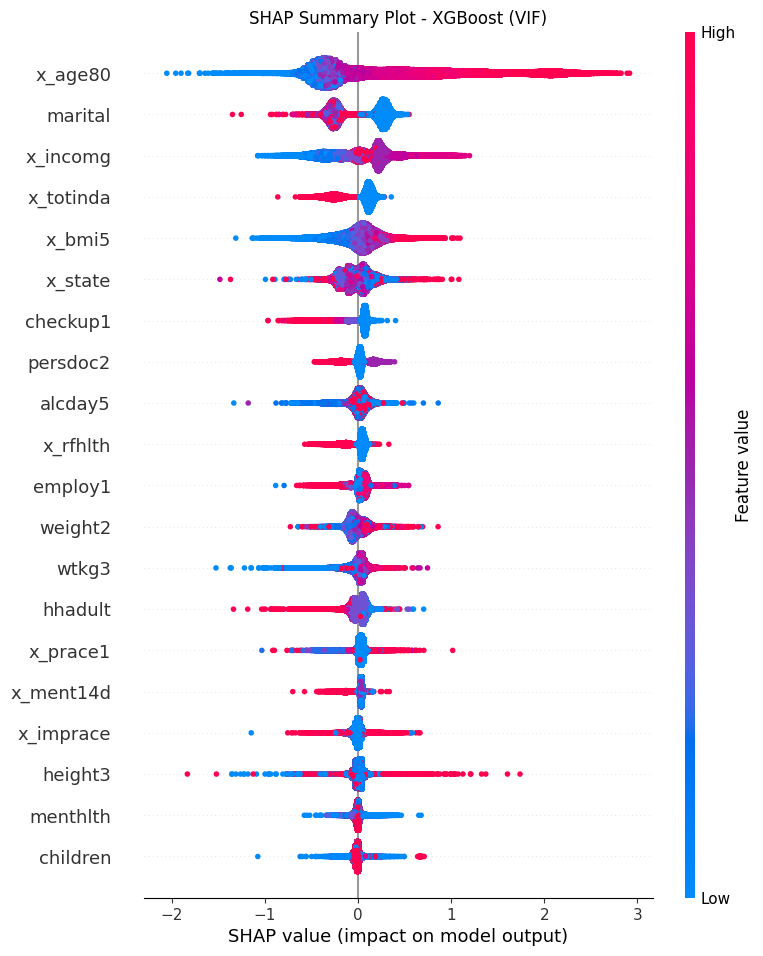


--- Feature Importance ---
      Feature  Importance
16    marital    0.184455
0     x_age80    0.110391
17   x_incomg    0.108901
11  x_totinda    0.086519
20   persdoc2    0.066034
22   x_rfhlth    0.054996
12  x_ment14d    0.045978
21   checkup1    0.038240
1      x_bmi5    0.031987
14  x_imprace    0.029191
15   x_prace1    0.026366
18    employ1    0.025165
7     alcday5    0.023555
19    x_state    0.022226
2     weight2    0.022119
3       wtkg3    0.019368
6     hhadult    0.018452
5    children    0.015815
13  x_phys14d    0.015384
8    menthlth    0.015068
10  x_casthm1    0.013978
4     height3    0.013050
9    physhlth    0.012764

===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 539620, number of negative: 255281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

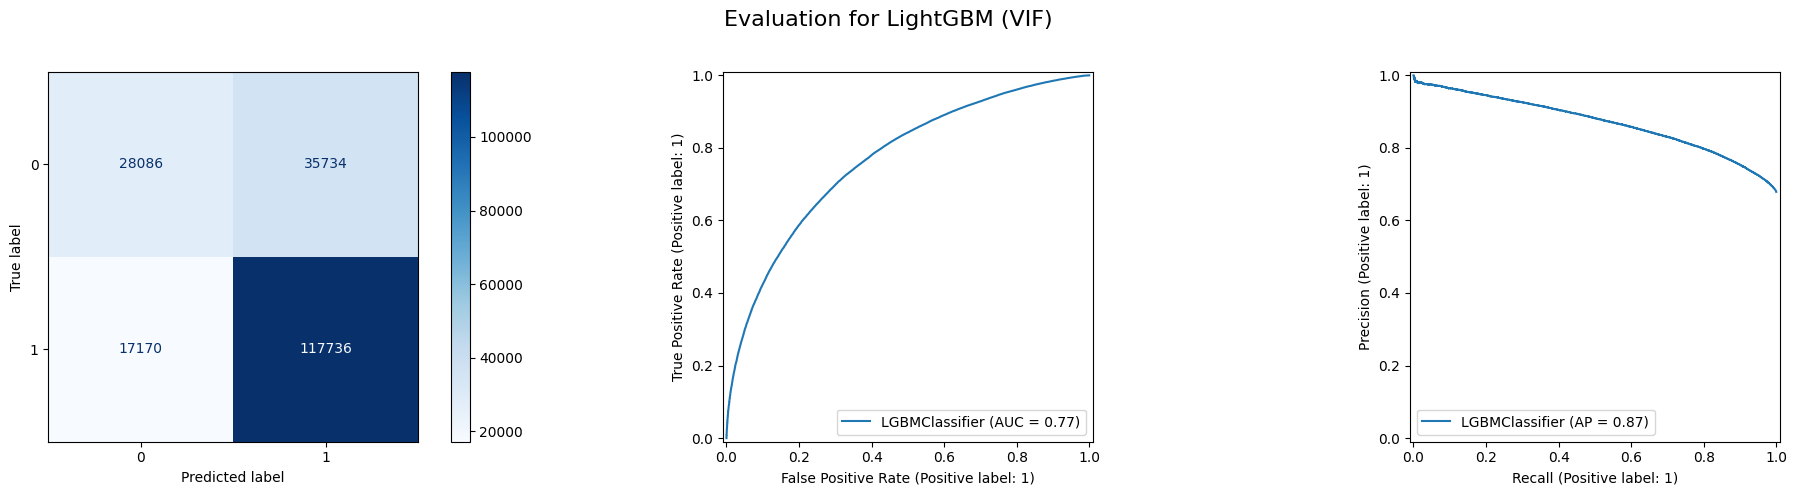


--- SHAP Analysis for LightGBM (VIF) ---


C:\Users\kiyan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


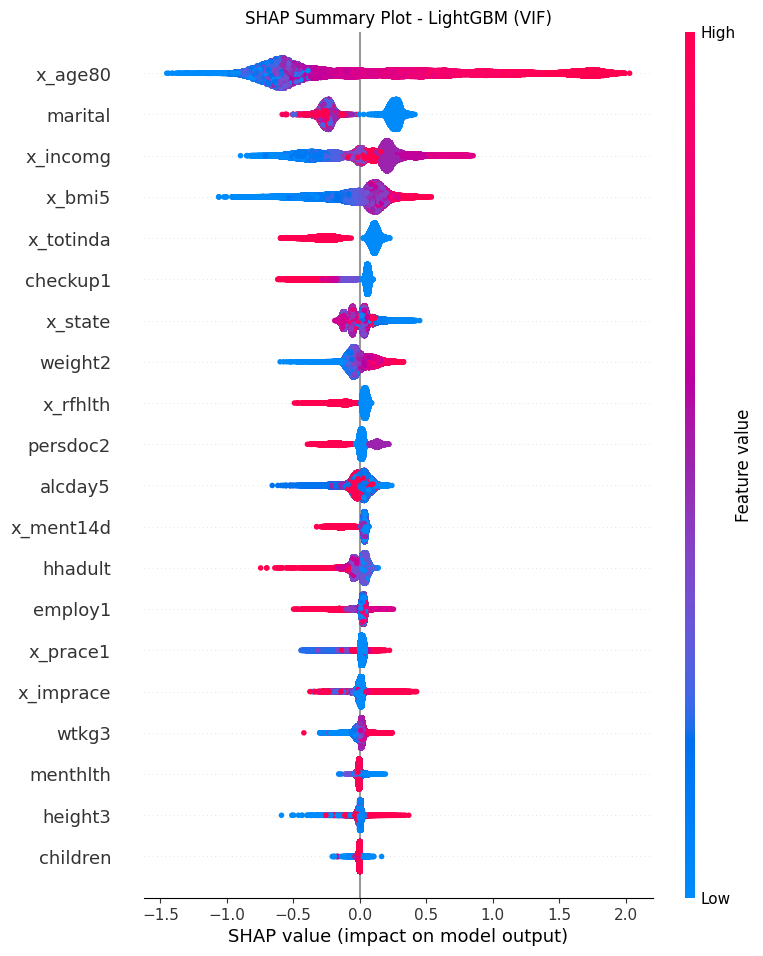


--- Feature Importance ---
      Feature  Importance
0     x_age80         429
1      x_bmi5         330
19    x_state         261
17   x_incomg         210
7     alcday5         203
2     weight2         177
14  x_imprace         142
4     height3         132
15   x_prace1         126
6     hhadult         120
3       wtkg3         112
16    marital         100
18    employ1          99
21   checkup1          92
11  x_totinda          90
8    menthlth          76
22   x_rfhlth          65
5    children          63
20   persdoc2          61
9    physhlth          43
12  x_ment14d          30
10  x_casthm1          28
13  x_phys14d          11

===== Training model: CatBoost (VIF) =====
Training completed in 94.07 seconds.
Accuracy: 0.7330 | F1-Score: 0.7188 | AUC: 0.7672


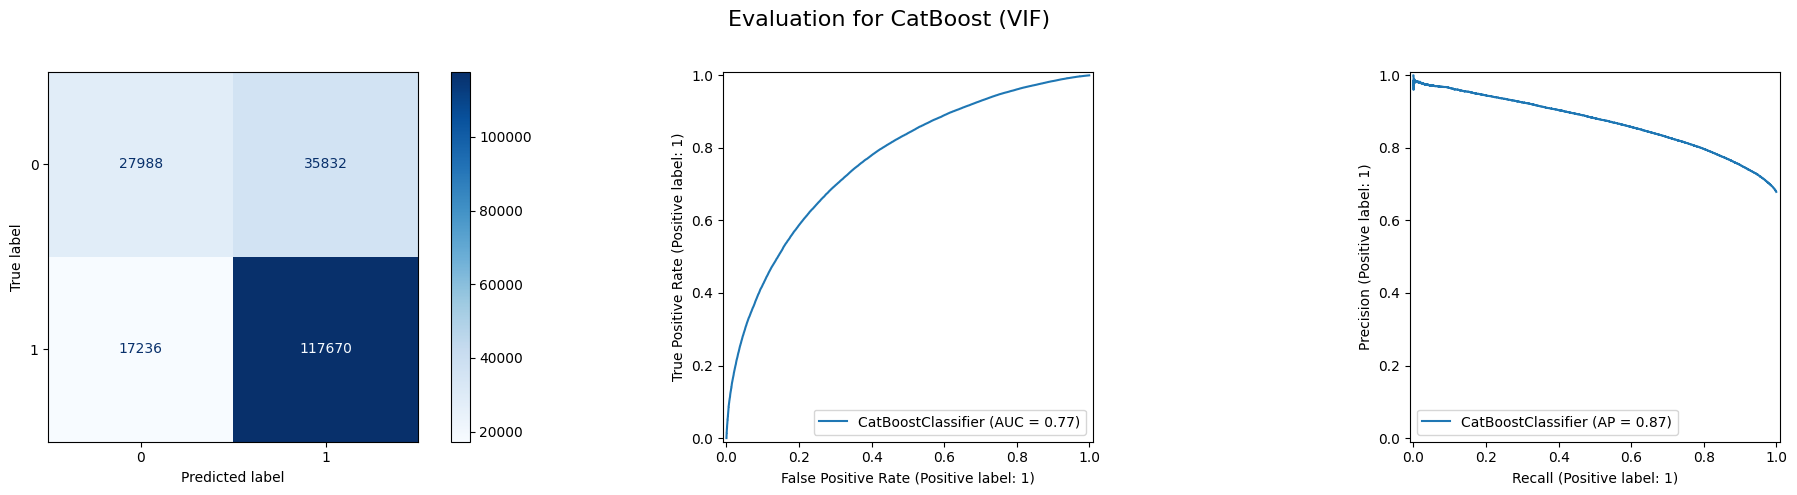


--- SHAP Analysis for CatBoost (VIF) ---


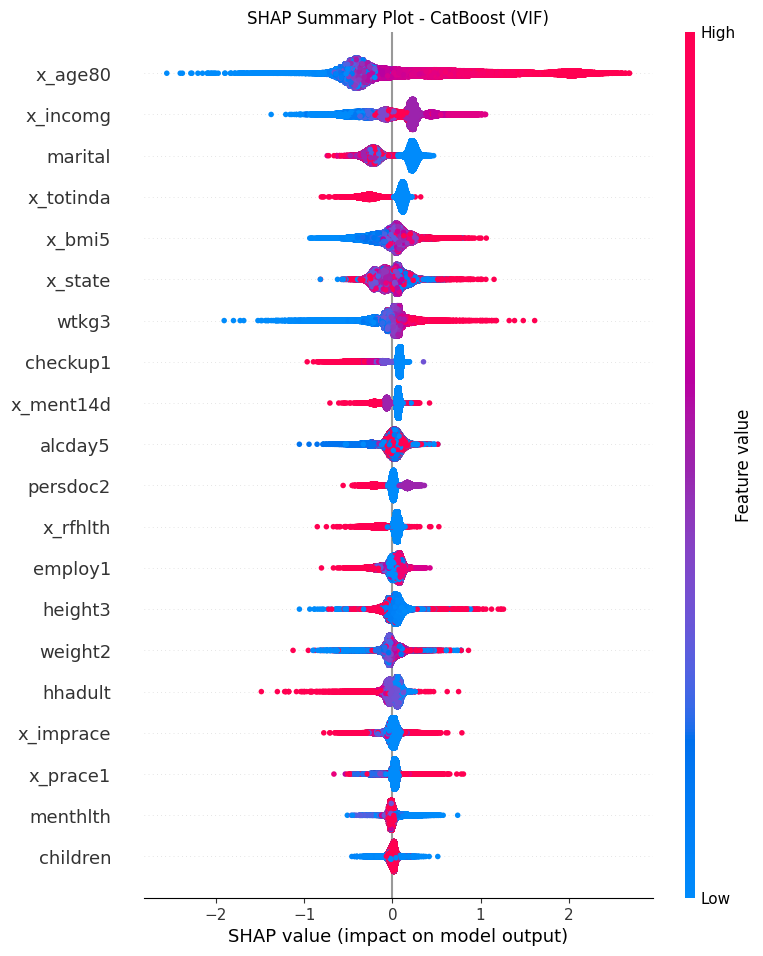


--- Feature Importance ---
      Feature  Importance
0     x_age80   19.310743
17   x_incomg    8.009045
1      x_bmi5    7.533893
19    x_state    7.085432
16    marital    5.392170
7     alcday5    5.200065
3       wtkg3    4.718231
4     height3    4.517930
18    employ1    4.249917
2     weight2    3.703351
14  x_imprace    3.509367
6     hhadult    3.215063
15   x_prace1    3.171478
20   persdoc2    2.678330
11  x_totinda    2.575626
8    menthlth    2.553137
21   checkup1    2.528474
5    children    2.473449
9    physhlth    2.341643
12  x_ment14d    2.039128
22   x_rfhlth    1.431156
10  x_casthm1    0.899859
13  x_phys14d    0.862513

===== Training model: XGBoost (VIF) =====


C:\Users\kiyan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:37:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training completed in 1.88 seconds.
Accuracy: 0.7325 | F1-Score: 0.7186 | AUC: 0.7655


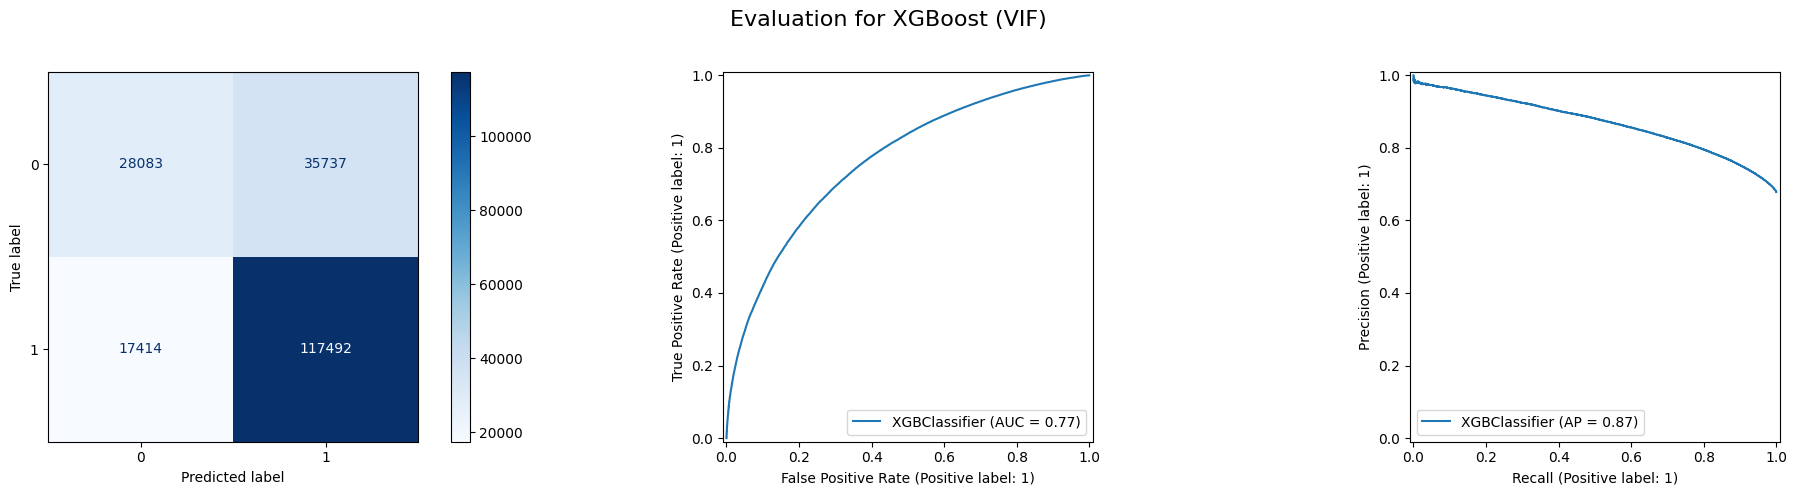


--- SHAP Analysis for XGBoost (VIF) ---


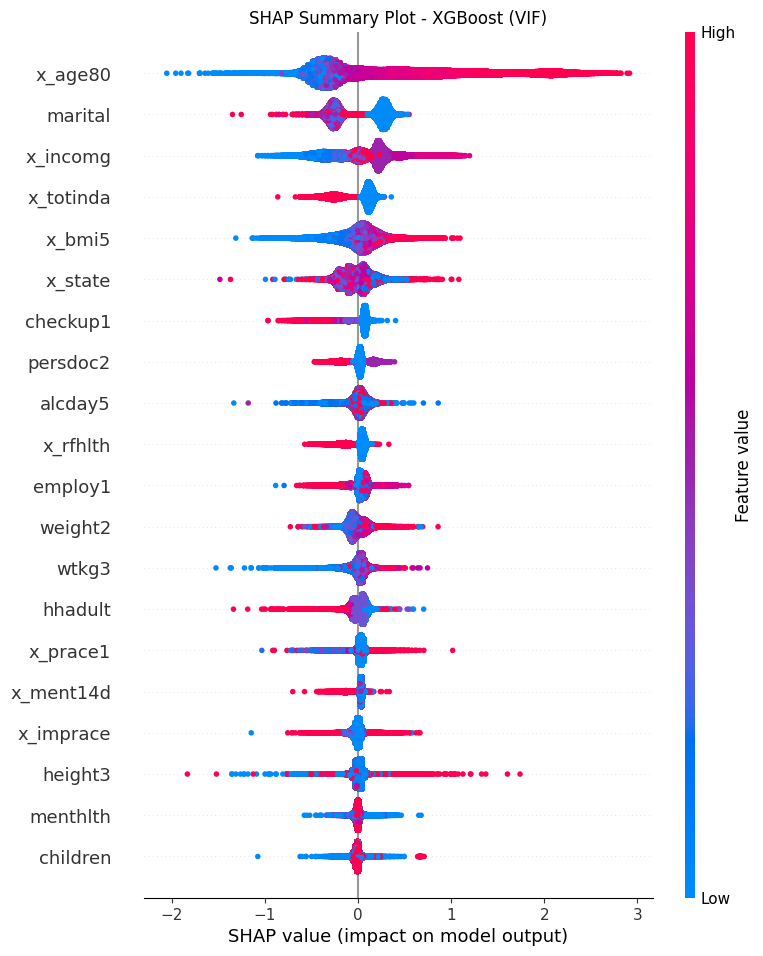


--- Feature Importance ---
      Feature  Importance
16    marital    0.184455
0     x_age80    0.110391
17   x_incomg    0.108901
11  x_totinda    0.086519
20   persdoc2    0.066034
22   x_rfhlth    0.054996
12  x_ment14d    0.045978
21   checkup1    0.038240
1      x_bmi5    0.031987
14  x_imprace    0.029191
15   x_prace1    0.026366
18    employ1    0.025165
7     alcday5    0.023555
19    x_state    0.022226
2     weight2    0.022119
3       wtkg3    0.019368
6     hhadult    0.018452
5    children    0.015815
13  x_phys14d    0.015384
8    menthlth    0.015068
10  x_casthm1    0.013978
4     height3    0.013050
9    physhlth    0.012764

===== Training model: LightGBM (VIF) =====
[LightGBM] [Info] Number of positive: 539620, number of negative: 255281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

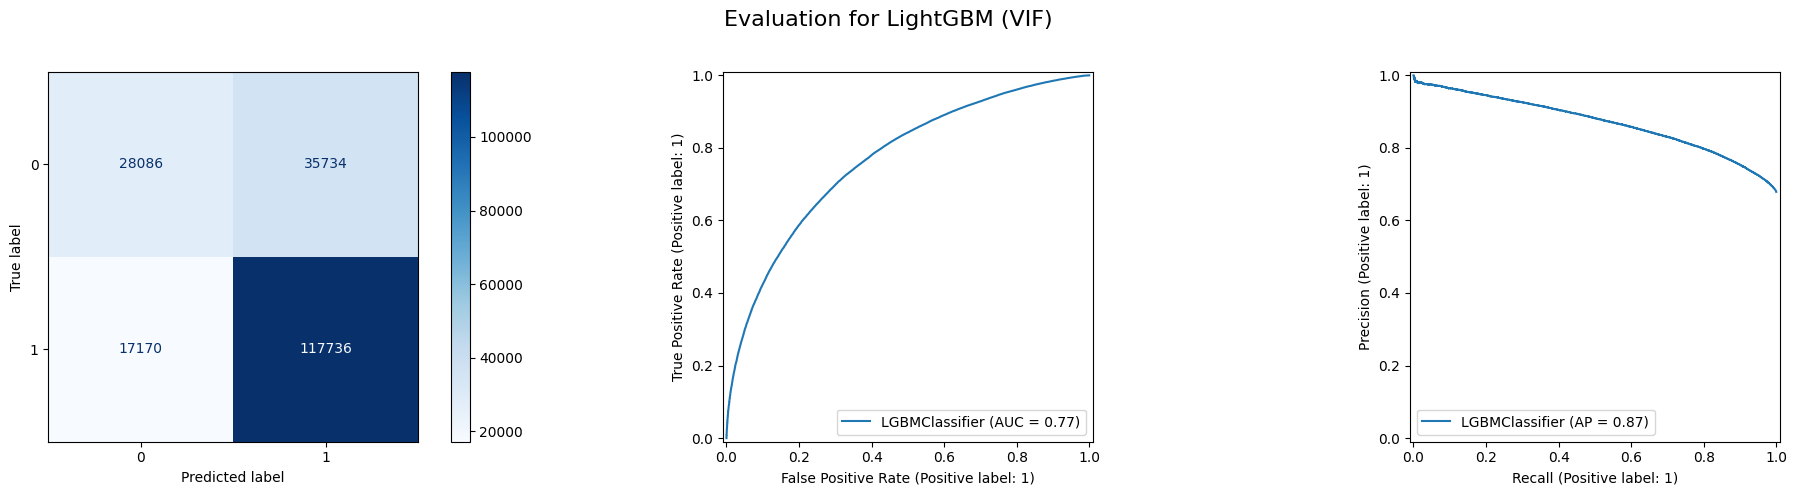


--- SHAP Analysis for LightGBM (VIF) ---


C:\Users\kiyan\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


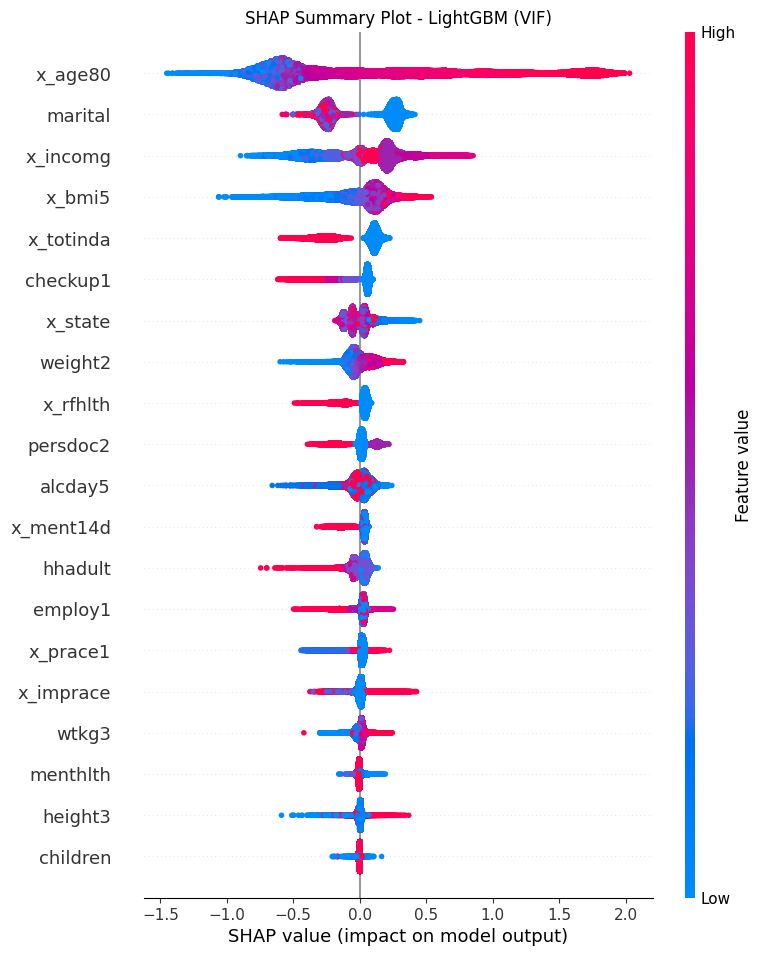


--- Feature Importance ---
      Feature  Importance
0     x_age80         429
1      x_bmi5         330
19    x_state         261
17   x_incomg         210
7     alcday5         203
2     weight2         177
14  x_imprace         142
4     height3         132
15   x_prace1         126
6     hhadult         120
3       wtkg3         112
16    marital         100
18    employ1          99
21   checkup1          92
11  x_totinda          90
8    menthlth          76
22   x_rfhlth          65
5    children          63
20   persdoc2          61
9    physhlth          43
12  x_ment14d          30
10  x_casthm1          28
13  x_phys14d          11

===== Training model: CatBoost (VIF) =====
Training completed in 94.83 seconds.
Accuracy: 0.7330 | F1-Score: 0.7188 | AUC: 0.7672


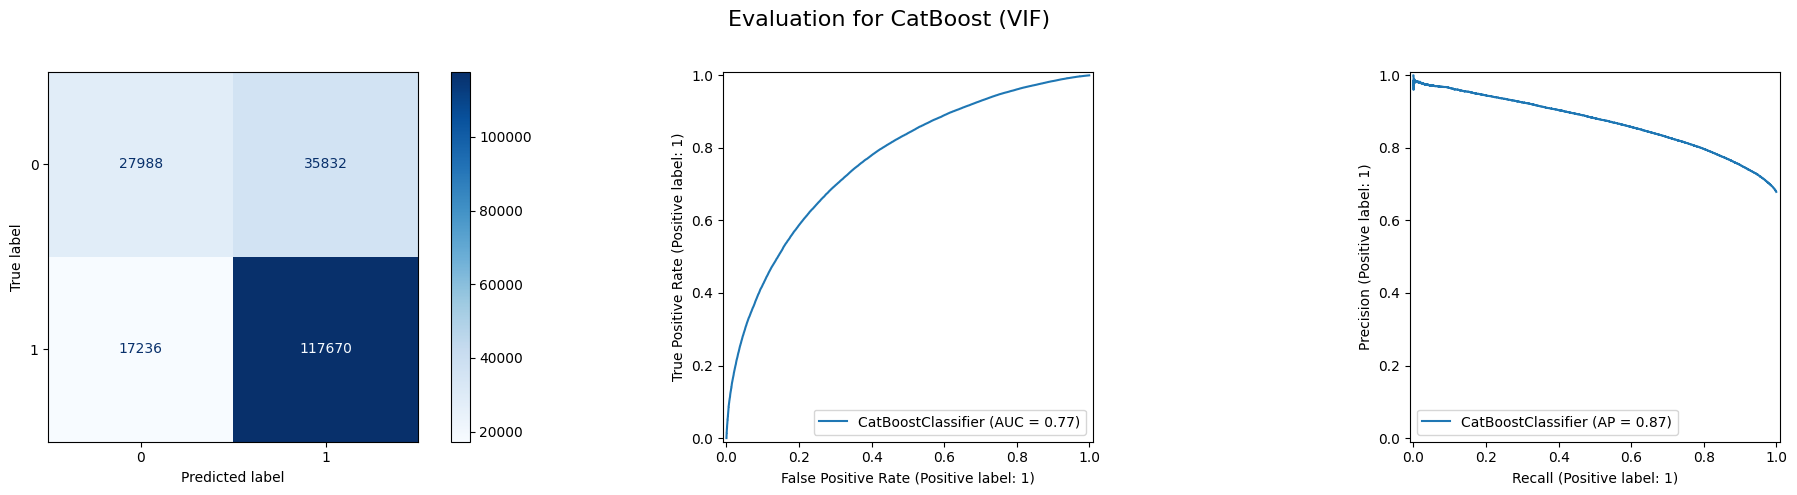


--- SHAP Analysis for CatBoost (VIF) ---


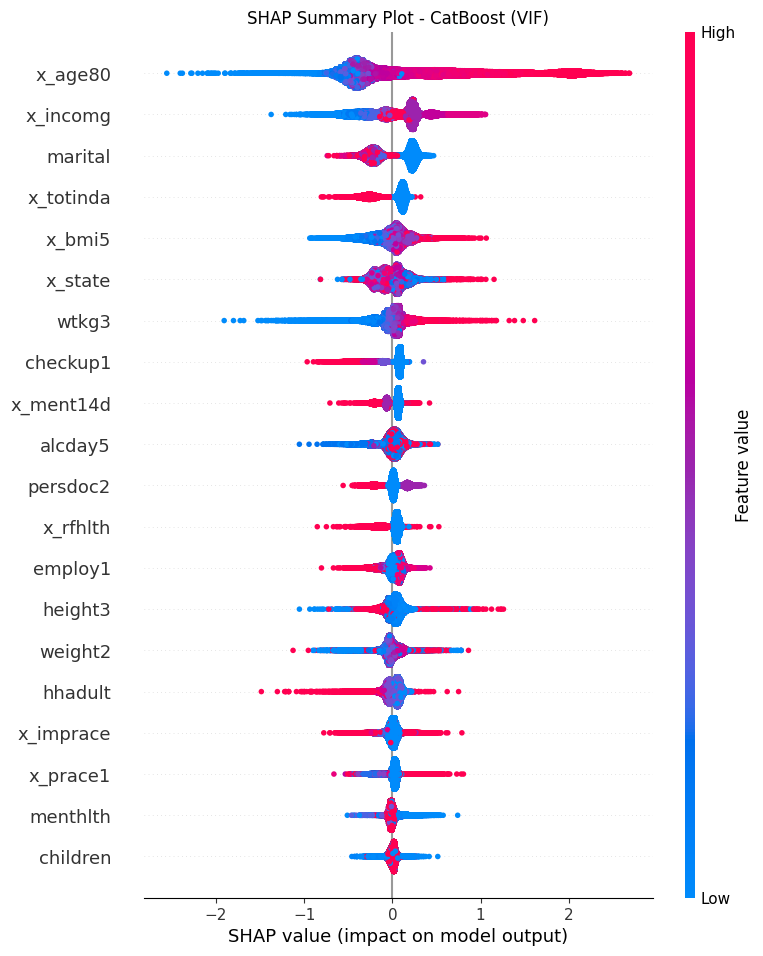


--- Feature Importance ---
      Feature  Importance
0     x_age80   19.310743
17   x_incomg    8.009045
1      x_bmi5    7.533893
19    x_state    7.085432
16    marital    5.392170
7     alcday5    5.200065
3       wtkg3    4.718231
4     height3    4.517930
18    employ1    4.249917
2     weight2    3.703351
14  x_imprace    3.509367
6     hhadult    3.215063
15   x_prace1    3.171478
20   persdoc2    2.678330
11  x_totinda    2.575626
8    menthlth    2.553137
21   checkup1    2.528474
5    children    2.473449
9    physhlth    2.341643
12  x_ment14d    2.039128
22   x_rfhlth    1.431156
10  x_casthm1    0.899859
13  x_phys14d    0.862513

Summary of Results:
                     Model  Accuracy  F1-Score       AUC    Time (s)
2  CatBoost (All Features)  0.742545  0.729380  0.783549  101.256728
1  LightGBM (All Features)  0.742213  0.728049  0.782297    4.241628
0   XGBoost (All Features)  0.740577  0.727649  0.781083    2.878517
4           LightGBM (VIF)  0.733784  0.719699  0.7

In [24]:
results_all = []
results_vif_new = []
results_vif_old = []

# All f
for model_name, model_func in models_boost.items():
    res_all = run_boost_model(
        model_name=f"{model_name} (All Features)",
        model_constructor_func=model_func,
        X_data=X_all,
        y_data=y,
        weights_data=weights
    )
    results_all.append(res_all)

#vif + year 
for model_name, model_func in models_boost.items():
    res_vif_new = run_boost_model(
        model_name=f"{model_name} (VIF)",
        model_constructor_func=model_func,
        X_data=X_vif_selected,
        y_data=y,
        weights_data=weights
    )
    results_vif_new.append(res_vif_new)

# vif
for model_name, model_func in models_boost.items():
    res_vif_old = run_boost_model(
        model_name=f"{model_name} (VIF)",
        model_constructor_func=model_func,
        X_data=X_last_vif,
        y_data=y,
        weights_data=weights
    )
    results_vif_old.append(res_vif_old)

# جمع‌بندی نتایج
df_results = pd.DataFrame(results_all + results_vif_new + results_vif_old)
print("\nSummary of Results:")
print(df_results.sort_values(by='AUC', ascending=False))
